* TITANIC DATASET ON KAGGLE

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
train = pd.read_csv('titanic_train.csv')

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
#To find out which rows have missing data(NaN)
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


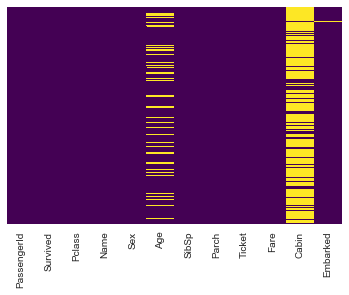

In [86]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [12]:
#Nearly 20% data is missing for age,so analysis can be done to fill it up. But most of cabin is not filled,so we may
#have to drop the entire column

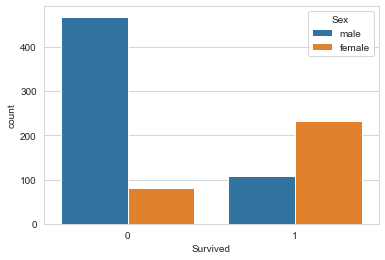

In [18]:
sns.countplot(x = 'Survived',hue = 'Sex',data = train)

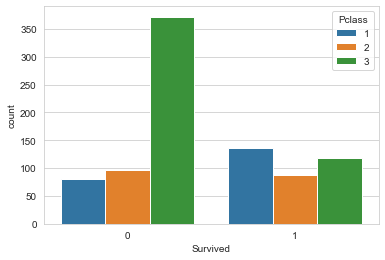

In [21]:
sns.countplot(x = 'Survived',hue = 'Pclass',data = train)

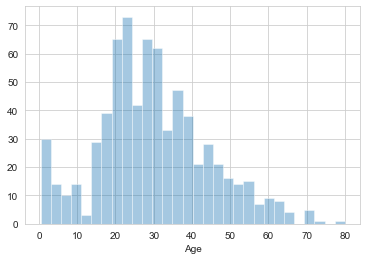

In [26]:
sns.distplot(train['Age'].dropna(),kde = False,bins = 30) #dropna removes problems caused by nullvalues

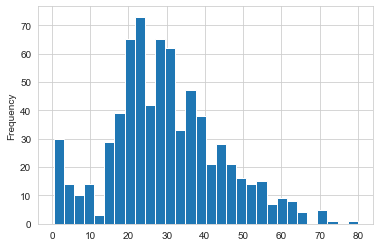

In [28]:
#Another method
train['Age'].plot.hist(bins = 30)

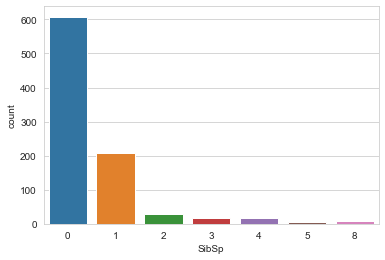

In [29]:
sns.countplot(x = 'SibSp',data = train)

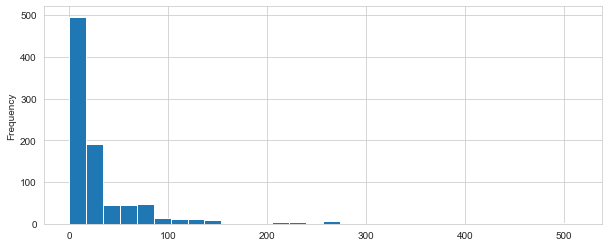

In [43]:
train['Fare'].plot.hist(bins = 30,figsize = (10,4))

In [37]:
#To use iplot
import cufflinks as cf

In [38]:
cf.go_offline()

In [39]:
train['Fare'].iplot(kind = 'hist',bins = 30)

In [41]:
#CLEANING THE DATA - Filling up the age column(imputation)

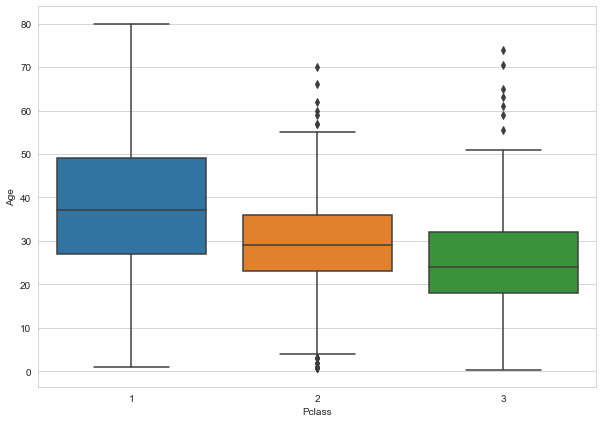

In [45]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass',y = 'Age', data = train)

In [87]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age        

In [88]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

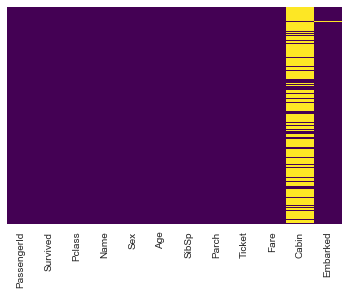

In [89]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap = 'viridis') #Age has been filled

In [90]:
train.drop('Cabin',axis = 1,inplace = True) #Delete cabin column

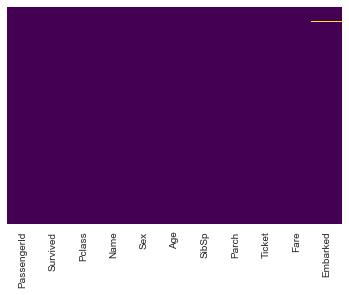

In [91]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap = 'viridis') #Age has been filled

In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [93]:
#To remove ALL missing values
train.dropna(inplace = True)

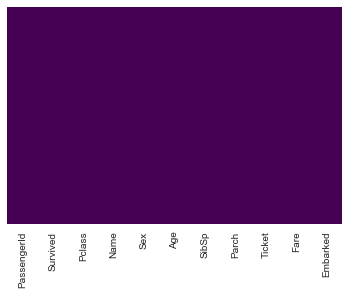

In [94]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap = 'viridis') #No missing values

In [95]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [96]:
#We now create a dummy variable column for both sex and embarked strings, and convert them into 0 and 1 so that the
#ML algo can understand them(it doesn't recognise 'male' and 'female')
#Embarked has C,Q,S as values

In [97]:
pd.get_dummies(train['Sex']) #Convert categorical variable into dummy/indicator variables.
#We only need 1 of these columns.If female = 1, male = 0 and vice versa.This double column problem is called
#MULTI-COLLINEARITY

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [98]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [99]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [100]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [101]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [102]:
train = pd.concat([train,sex,embark],axis=1)

In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [104]:
#We don't need Sex,Embarked(redundant);Name,Ticket(Can't use it for anything)

In [105]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [106]:
train.head() #All data is numerical, and hence perfect for a Machine Learning algorithm

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [107]:
train.drop('PassengerId',axis = 1,inplace=True) #PassengerId is of no use to algo

In [108]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [109]:
#We will try Pclass with 1,2,3 values, and then try dummy implementation on it later

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X = train.drop('Survived',axis = 1)
y = train['Survived']

In [112]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
logmodel = LogisticRegression()

In [115]:
logmodel.fit(X_train,y_train)

C:\Users\Hariharan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
predictions = logmodel.predict(X_test)

In [117]:
from sklearn.metrics import classification_report

In [118]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)